In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rnn"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [3]:
import tensorflow as tf

In [4]:
reset_graph()

n_inputs = 3
n_neurons = 5

X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

Wx = tf.Variable(tf.random_normal(shape = [n_inputs, n_neurons], dtype = tf.float32))
Wy = tf.Variable(tf.random_normal(shape = [n_neurons, n_neurons], dtype = tf.float32))
b = tf.Variable(tf.zeros([1, n_neurons], dtype = tf.float32))

Y0 = tf.tanh(tf.matmul(X0, Wx) + b)
Y1 = tf.tanh(tf.matmul(Y0, Wy) + tf.matmul(X1, Wx) + b)

init = tf.global_variables_initializer()

In [5]:
import numpy as np

X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]]) # t = 0
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]]) # t = 1

with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict = {X0: X0_batch, X1: X1_batch})

In [6]:
print(Y0_val)

[[-0.0664006   0.96257669  0.68105793  0.70918542 -0.89821601]
 [ 0.9977755  -0.71978897 -0.99657619  0.96739239 -0.99989718]
 [ 0.99999785 -0.99898815 -0.99999893  0.99677622 -0.99999982]
 [ 1.         -1.         -1.         -0.99818927  0.99950868]]


In [7]:
print(Y1_val)

[[ 1.         -1.         -1.          0.40200275 -0.99999982]
 [-0.12210425  0.62805289  0.96718431 -0.99371219 -0.25839356]
 [ 0.99999821 -0.9999994  -0.9999975  -0.85943305 -0.9999879 ]
 [ 0.99928284 -0.99999803 -0.99990582  0.98579615 -0.92205751]]


In [8]:
n_inputs = 3
n_neurons = 5

In [10]:
reset_graph()

X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units = n_neurons)
output_seqs, states = tf.contrib.rnn.static_rnn(basic_cell, [X0, X1], dtype = tf.float32)

Y0, Y1 = output_seqs

In [11]:
init = tf.global_variables_initializer()

In [12]:
X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]])
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]])

with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict = {X0: X0_batch, X1: X1_batch})

In [13]:
Y0_val

array([[ 0.30741334, -0.32884315, -0.65428466, -0.93850589,  0.52089024],
       [ 0.99122757, -0.95425403, -0.75180787, -0.99952078,  0.98202348],
       [ 0.99992681, -0.99783254, -0.82473528, -0.9999963 ,  0.99947792],
       [ 0.99677098, -0.68750614,  0.84199691,  0.93039113,  0.81206834]], dtype=float32)

In [14]:
Y1_val

array([[ 0.99998897, -0.99976057, -0.0667929 , -0.99998027,  0.99982214],
       [-0.65249431, -0.51520866, -0.37968946, -0.59225935, -0.08968391],
       [ 0.99862397, -0.99715203, -0.03308637, -0.99915659,  0.99329019],
       [ 0.99681675, -0.95981938,  0.3966063 , -0.83076054,  0.79671967]], dtype=float32)

In [3]:
n_steps = 2
n_inputs = 3
n_neurons = 5

In [4]:
reset_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
X_seqs = tf.unstack(tf.transpose(X, perm = [1, 0, 2]))

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units = n_neurons)
output_seqs, states = tf.contrib.rnn.static_rnn(basic_cell, X_seqs, dtype = tf.float32)

outputs = tf.transpose(tf.stack(output_seqs), perm = [1, 0, 2])

In [5]:
init = tf.global_variables_initializer()

In [6]:
X_batch = np.array([
        # t = 0      t = 1 
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])

with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict = {X: X_batch})

In [7]:
X_batch.shape

(4, 2, 3)

In [9]:
print(outputs_val)

[[[-0.45652324 -0.68064123  0.40938237  0.63104504 -0.45732826]
  [-0.94287997 -0.99988699  0.94055808  0.99999839 -0.99999982]]

 [[-0.80015343 -0.99218267  0.78177965  0.99710321 -0.99646091]
  [-0.63711601  0.11300927  0.5798437   0.4310559  -0.6371699 ]]

 [[-0.93605185 -0.99983788  0.93088669  0.9999814  -0.99998307]
  [-0.9165386  -0.99456048  0.89605403  0.99987197 -0.99997509]]

 [[ 0.9927367  -0.99819332 -0.55543643  0.9989031  -0.9953323 ]
  [-0.02746338 -0.73191983  0.7827872   0.95256811 -0.97817701]]]


In [12]:
n_steps = 2
n_inputs = 3
n_neurons = 5

In [13]:
reset_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units = n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype = tf.float32)

In [14]:
init = tf.global_variables_initializer()

In [15]:
X_batch = np.array([
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])

with tf.Session() as sess:
    init.run()
    outputs_val, states_val = sess.run([outputs, states], feed_dict = {X: X_batch})

In [16]:
print(outputs_val)

[[[-0.46430176 -0.04473137  0.45657092 -0.601556   -0.28795418]
  [-0.99999988 -0.97130966  0.99933434 -0.6387586  -0.90433723]]

 [[-0.9983902  -0.71462387  0.95593154 -0.86314547 -0.68196076]
  [ 0.52432048  0.32354674  0.54770964  0.32016146 -0.60165441]]

 [[-0.99999648 -0.94119084  0.99728239 -0.95754659 -0.87851131]
  [-0.99987793 -0.88867241  0.99540216 -0.22945848 -0.91968971]]

 [[-0.99997151 -0.75314504  0.73893744 -0.93929273  0.46864882]
  [-0.96881706 -0.10343011  0.8409428  -0.09726928 -0.28027278]]]


In [17]:
print(states_val)

[[-0.99999988 -0.97130966  0.99933434 -0.6387586  -0.90433723]
 [ 0.52432048  0.32354674  0.54770964  0.32016146 -0.60165441]
 [-0.99987793 -0.88867241  0.99540216 -0.22945848 -0.91968971]
 [-0.96881706 -0.10343011  0.8409428  -0.09726928 -0.28027278]]


In [4]:
n_steps = 2
n_inputs = 3
n_neurons = 5

reset_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units = n_neurons)

In [5]:
seq_length = tf.placeholder(tf.int32, [None])

In [6]:
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype = tf.float32, sequence_length = seq_length)

In [7]:
init = tf.global_variables_initializer()

In [8]:
X_batch = np.array([
        # step 0     step 1
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2 (padded with zero vectors)
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])
seq_length_batch = np.array([2, 1, 2, 2])

In [9]:
with tf.Session() as sess:
    init.run()
    
    outputs_val, states_val = sess.run(
    [outputs, states], feed_dict = {X: X_batch, seq_length: seq_length_batch})

In [10]:
print(outputs_val)

[[[ 0.65519077 -0.38949275 -0.6105231   0.59276378 -0.48083815]
  [ 0.99999392  0.99594402  0.45825899  0.99916971  0.89911348]]

 [[ 0.99782628  0.44117272 -0.59160739  0.97499579 -0.35678416]
  [ 0.          0.          0.          0.          0.        ]]

 [[ 0.99998862  0.87606186 -0.57201713  0.99874693 -0.21872665]
  [ 0.99956119  0.98087293  0.88909107  0.97684324  0.52034187]]

 [[ 0.99904662  0.92710745  0.23267001  0.9804318   0.99994713]
  [ 0.97913378  0.71947402  0.93568647  0.63649684 -0.1785471 ]]]


In [11]:
print(states_val)

[[ 0.99999392  0.99594402  0.45825899  0.99916971  0.89911348]
 [ 0.99782628  0.44117272 -0.59160739  0.97499579 -0.35678416]
 [ 0.99956119  0.98087293  0.88909107  0.97684324  0.52034187]
 [ 0.97913378  0.71947402  0.93568647  0.63649684 -0.1785471 ]]


In [5]:
reset_graph()

n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units = n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype = tf.float32)

logits = tf.layers.dense(states, n_outputs)

xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits)
loss = tf.reduce_mean(xentropy)

optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)

training_op = optimizer.minimize(loss)

correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

In [6]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('/tmp/data')
X_test = mnist.test.images.reshape((-1, n_steps, n_inputs))
y_test = mnist.test.labels

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [23]:
n_epochs = 100
batch_size = 150

with tf.Session() as sess:
    init.run()
    
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict = {X: X_batch, y: y_batch})
            
        acc_train = accuracy.eval(feed_dict = {X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict = {X: X_test, y: y_test})
        
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

0 Train accuracy: 0.933333 Test accuracy: 0.923
1 Train accuracy: 0.953333 Test accuracy: 0.9533
2 Train accuracy: 0.96 Test accuracy: 0.954
3 Train accuracy: 0.973333 Test accuracy: 0.9528
4 Train accuracy: 0.94 Test accuracy: 0.9637
5 Train accuracy: 0.96 Test accuracy: 0.9675
6 Train accuracy: 0.98 Test accuracy: 0.9731
7 Train accuracy: 0.98 Test accuracy: 0.9683
8 Train accuracy: 0.953333 Test accuracy: 0.9716
9 Train accuracy: 0.966667 Test accuracy: 0.9681
10 Train accuracy: 0.973333 Test accuracy: 0.971
11 Train accuracy: 0.973333 Test accuracy: 0.9679
12 Train accuracy: 0.973333 Test accuracy: 0.972
13 Train accuracy: 0.98 Test accuracy: 0.9773
14 Train accuracy: 0.986667 Test accuracy: 0.9767
15 Train accuracy: 1.0 Test accuracy: 0.9715
16 Train accuracy: 1.0 Test accuracy: 0.9748
17 Train accuracy: 0.993333 Test accuracy: 0.9757
18 Train accuracy: 0.973333 Test accuracy: 0.9718
19 Train accuracy: 0.986667 Test accuracy: 0.979
20 Train accuracy: 0.986667 Test accuracy: 0.9738

In [19]:
reset_graph()

n_steps = 28
n_inputs = 28
n_outputs = 10

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

In [20]:
n_neurons = 100
n_layers = 3

layers = [tf.contrib.rnn.BasicRNNCell(num_units = n_neurons, activation = tf.nn.relu) for layer in range(n_layers)]
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype = tf.float32)

In [21]:
states_concat = tf.concat(axis = 1, values = states)

logits = tf.layers.dense(states_concat, n_outputs)

xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits)
loss = tf.reduce_mean(xentropy)

optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(loss)

correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

In [27]:
n_epochs = 10
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape(-1, n_steps, n_inputs)
            sess.run(training_op, feed_dict = {X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict = {X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict = {X: X_test, y: y_test})
        state_val, state_concat_val = sess.run([states, states_concat], feed_dict = {X: X_test, y: y_test})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

0 Train accuracy: 0.96 Test accuracy: 0.9534
1 Train accuracy: 0.946667 Test accuracy: 0.9574
2 Train accuracy: 0.986667 Test accuracy: 0.9743
3 Train accuracy: 0.98 Test accuracy: 0.9718
4 Train accuracy: 0.953333 Test accuracy: 0.9721
5 Train accuracy: 0.993333 Test accuracy: 0.9748
6 Train accuracy: 0.986667 Test accuracy: 0.9769
7 Train accuracy: 0.98 Test accuracy: 0.9753
8 Train accuracy: 0.966667 Test accuracy: 0.9775
9 Train accuracy: 1.0 Test accuracy: 0.9788


In [33]:
print(state_concat_val.shape)

(10000, 300)


In [34]:
X_test.shape

(10000, 28, 28)

In [41]:
state_val[2].shape

(10000, 100)

In [13]:
t_min, t_max = 0, 30
resolution = 0.1

def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t * 5)

def next_batch(batch_size, n_steps):
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    Ts = t0 + np.arange(0., n_steps + 1) * resolution
    ys = time_series(Ts)
    
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)

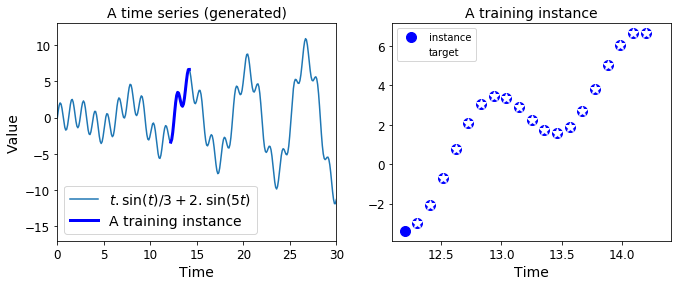

In [21]:
t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))

n_steps = 20
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("A time series (generated)", fontsize=14)
plt.plot(t, time_series(t), label=r"$t . \sin(t) / 3 + 2 . \sin(5t)$")
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "b-", linewidth=3, label="A training instance")
plt.legend(loc="lower left", fontsize=14)
plt.axis([0, 30, -17, 13])
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(122)
plt.title("A training instance", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.legend(loc="upper left")
plt.xlabel("Time")


# save_fig("time_series_plot")
plt.show()

In [47]:
X_batch, y_batch = next_batch(1, n_steps)

In [48]:
np.c_[X_batch[0], y_batch[0]]

array([[ 0.8424461 ,  0.35290769],
       [ 0.35290769, -0.51614929],
       [-0.51614929, -1.57283982],
       [-1.57283982, -2.57680734],
       [-2.57680734, -3.29774113],
       [-3.29774113, -3.57145805],
       [-3.57145805, -3.33982264],
       [-3.33982264, -2.66473592],
       [-2.66473592, -1.71277197],
       [-1.71277197, -0.7142275 ],
       [-0.7142275 ,  0.09338633],
       [ 0.09338633,  0.52357201],
       [ 0.52357201,  0.48653496],
       [ 0.48653496,  0.01114626],
       [ 0.01114626, -0.76219977],
       [-0.76219977, -1.61608472],
       [-1.61608472, -2.30947541],
       [-2.30947541, -2.63696616],
       [-2.63696616, -2.47934787],
       [-2.47934787, -1.83312113]])

In [23]:
reset_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

cell = tf.contrib.rnn.BasicRNNCell(num_units = n_neurons, activation = tf.nn.relu)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype = tf.float32)

In [24]:
reset_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

In [25]:
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicRNNCell(num_units = n_neurons, activation = tf.nn.relu),
    output_size = n_outputs)

In [26]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype = tf.float32)

In [27]:
learning_rate = 0.001

loss = tf.reduce_mean(tf.square(outputs - y))

optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)

training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [30]:
n_iterations = 1500
batch_size = 50

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        sess.run(training_op, feed_dict = {X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict = {X: X_batch, y: y_batch})
            print(iteration, '\tMSE:', mse)
            
    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict = {X: X_new})

0 	MSE: 24.2034
100 	MSE: 0.719874
200 	MSE: 0.328811
300 	MSE: 0.101605
400 	MSE: 0.0789851
500 	MSE: 0.0566228
600 	MSE: 0.0455514
700 	MSE: 0.0502714
800 	MSE: 0.0592084
900 	MSE: 0.046939
1000 	MSE: 0.0489033
1100 	MSE: 0.041731
1200 	MSE: 0.0444933
1300 	MSE: 0.0385658
1400 	MSE: 0.0361817


In [31]:
y_pred
    

array([[[-3.4587388 ],
        [-2.54896474],
        [-1.20242071],
        [ 0.72430003],
        [ 2.10049081],
        [ 3.13209486],
        [ 3.5045464 ],
        [ 3.31841683],
        [ 2.77029514],
        [ 2.17114282],
        [ 1.71172369],
        [ 1.52311432],
        [ 1.88399076],
        [ 2.75332928],
        [ 3.96292877],
        [ 5.11587524],
        [ 6.10154676],
        [ 6.65476084],
        [ 6.61076212],
        [ 6.06466246]]], dtype=float32)

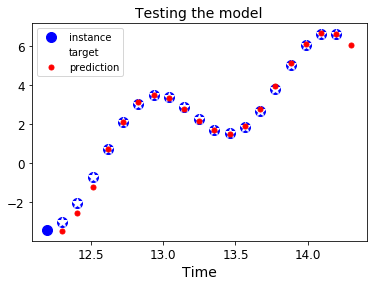

In [32]:
plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

#save_fig("time_series_pred_plot")
plt.show()

In [43]:
reset_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

In [44]:
cell = tf.contrib.rnn.BasicRNNCell(num_units = n_neurons, activation = tf.nn.relu)
rnn_outputs, states = tf.nn.dynamic_rnn(cell, X, dtype = tf.float32)

In [45]:
learning_rate = 0.001

In [46]:
stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

In [47]:
loss = tf.reduce_mean(tf.square(outputs - y))

optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)

training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

saver = tf.train.Saver()

In [48]:
n_iterations = 1500
batch_size = 50

with tf.Session() as sess:
    init.run()
    
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        sess.run(training_op, feed_dict = {X: X_batch, y: y_batch})
        
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict = {X: X_batch, y: y_batch})
            print(iteration, '\tMSE:', mse)
            
    
    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict = {X: X_new})
    
    saver.save(sess, "./my_time_series_model")

0 	MSE: 13.3597
100 	MSE: 0.545058
200 	MSE: 0.185906
300 	MSE: 0.0884326
400 	MSE: 0.0616202
500 	MSE: 0.0616056
600 	MSE: 0.0575924
700 	MSE: 0.0499266
800 	MSE: 0.0525077
900 	MSE: 0.0485768
1000 	MSE: 0.0497692
1100 	MSE: 0.0484801
1200 	MSE: 0.041544
1300 	MSE: 0.0513182
1400 	MSE: 0.0420216


In [41]:
y_pred

array([[[-3.41158366],
        [-2.49317551],
        [-1.01438975],
        [ 0.71798664],
        [ 2.13264608],
        [ 3.13726687],
        [ 3.50810361],
        [ 3.34941792],
        [ 2.83438301],
        [ 2.14987826],
        [ 1.66687858],
        [ 1.51675391],
        [ 1.88089097],
        [ 2.69896603],
        [ 3.85113406],
        [ 5.08197451],
        [ 6.10799837],
        [ 6.68549967],
        [ 6.65602875],
        [ 6.02080202]]], dtype=float32)

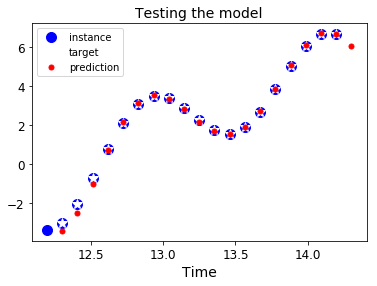

In [42]:
plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

In [52]:
with tf.Session() as sess:
    saver.restore(sess, './my_time_series_model')
    
    sequence = [0.] * n_steps
    
    for iteration in range(300):
        X_batch = np.array(sequence[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict = {X: X_batch})
        sequence.append(y_pred[0, -1, 0])

INFO:tensorflow:Restoring parameters from ./my_time_series_model


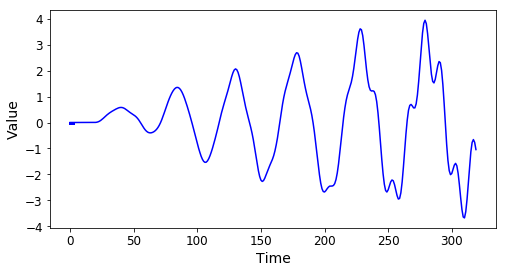

In [54]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(len(sequence)), sequence, "b-")
plt.plot(t[:n_steps], sequence[:n_steps], "b-", linewidth=3)
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

In [57]:
y_pred

array([[[-2.07924581],
        [-1.80159831],
        [-1.54198086],
        [-1.4114418 ],
        [-1.58227181],
        [-1.92636371],
        [-2.36576915],
        [-2.9435575 ],
        [-3.39661908],
        [-3.64746118],
        [-3.66038013],
        [-3.42856002],
        [-2.98017836],
        [-2.34401155],
        [-1.68291497],
        [-1.11419451],
        [-0.76653093],
        [-0.66393441],
        [-0.77208024],
        [-1.04430676]]], dtype=float32)

In [58]:
y_pred[0]

array([[-2.07924581],
       [-1.80159831],
       [-1.54198086],
       [-1.4114418 ],
       [-1.58227181],
       [-1.92636371],
       [-2.36576915],
       [-2.9435575 ],
       [-3.39661908],
       [-3.64746118],
       [-3.66038013],
       [-3.42856002],
       [-2.98017836],
       [-2.34401155],
       [-1.68291497],
       [-1.11419451],
       [-0.76653093],
       [-0.66393441],
       [-0.77208024],
       [-1.04430676]], dtype=float32)

In [60]:
y_pred[0][-1]

array([-1.04430676], dtype=float32)

In [61]:
with tf.Session() as sess:
    saver.restore(sess, './my_time_series_model')
    
    sequence1 = [0. for i in range(n_steps)]
    for iteration in range(len(t) - n_steps):
        X_batch = np.array(sequence1[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict = {X: X_batch})
        sequence1.append(y_pred[0, -1, 0])
        
    sequence2 = [time_series(i * resolution + t_min + (t_max-t_min/3)) for i in range(n_steps)]
    for iteration in range(len(t) - n_steps):
        X_batch = np.array(sequence2[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict = {X: X_batch})
        sequence2.append(y_pred[0, -1, 0])

INFO:tensorflow:Restoring parameters from ./my_time_series_model


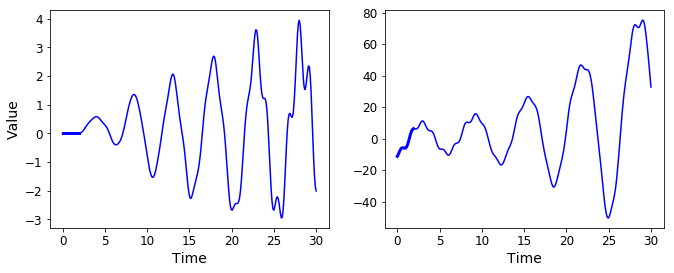

In [62]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(t, sequence1, "b-")
plt.plot(t[:n_steps], sequence1[:n_steps], "b-", linewidth=3)
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(122)
plt.plot(t, sequence2, "b-")
plt.plot(t[:n_steps], sequence2[:n_steps], "b-", linewidth=3)
plt.xlabel("Time")
# save_fig("creative_sequence_plot")
plt.show()

In [63]:
reset_graph()

n_inputs = 2
n_steps = 5

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

In [64]:
n_neurons = 100
n_layers = 3

layers = [tf.contrib.rnn.BasicRNNCell(num_units = n_neurons)
         for layer in range(n_layers)]

multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)

outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype = tf.float32)

In [66]:
init = tf.global_variables_initializer()

In [67]:
X_batch = np.random.rand(2, n_steps, n_inputs)

In [68]:
with tf.Session() as sess:
    init.run()
    outputs_val, states_val = sess.run([outputs, states], feed_dict = {X: X_batch})

In [69]:
outputs_val.shape

(2, 5, 100)

In [71]:
states_val[2].shape

(2, 100)

In [72]:
reset_graph()

n_inputs = 1
n_neurons = 100
n_layers = 3
n_steps = 20
n_outputs = 1

In [73]:
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

In [76]:
keep_prob = tf.placeholder_with_default(1.0, shape = ())

cells = [tf.contrib.rnn.BasicRNNCell(num_units = n_neurons)
       for layer in range(n_layers)]

cells_drop = [tf.contrib.rnn.DropoutWrapper(cell, input_keep_prob = keep_prob)
            for cell in cells]

multi_layer_cell = tf.contrib.rnn.MultiRNNCell(cells_drop)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype = tf.float32)

In [77]:
learning_rate = 0.01

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [78]:
n_iterations = 1500
batch_size = 50
train_keep_prob = 0.5

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        _, mse = sess.run([training_op, loss], feed_dict = {X: X_batch, y: y_batch, keep_prob: train_keep_prob})
        
        if iteration % 100 == 0:
            print(iteration, 'training MSE:', mse)
            
    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict = {X: X_new})

0 training MSE: 14.8463
100 training MSE: 4.65689
200 training MSE: 4.8672
300 training MSE: 4.03585
400 training MSE: 3.52386
500 training MSE: 3.31502
600 training MSE: 2.97274
700 training MSE: 4.54277
800 training MSE: 2.82979
900 training MSE: 3.89899
1000 training MSE: 3.09968
1100 training MSE: 3.09812
1200 training MSE: 2.46659
1300 training MSE: 3.1102
1400 training MSE: 3.02472


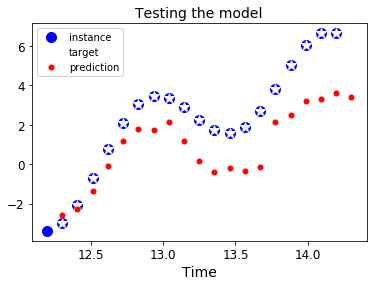

In [79]:
plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

In [81]:
reset_graph()

n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10
n_layers = 3

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

lstm_cells = [tf.contrib.rnn.BasicLSTMCell(num_units = n_neurons)
            for layer in range(n_layers)]

multi_cell = tf.contrib.rnn.MultiRNNCell(lstm_cells)

outputs, states = tf.nn.dynamic_rnn(multi_cell, X, dtype = tf.float32)
top_layer_h_state = states[-1][1]

logits = tf.layers.dense(top_layer_h_state, n_outputs, name = 'softmax')

xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits)
loss = tf.reduce_mean(xentropy, name = 'loss')

optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(loss)

correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [82]:
init = tf.global_variables_initializer()

In [83]:
states

(LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_4:0' shape=(?, 150) dtype=float32>),
 LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_5:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_6:0' shape=(?, 150) dtype=float32>),
 LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_7:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_8:0' shape=(?, 150) dtype=float32>))

In [84]:
top_layer_h_state

<tf.Tensor 'rnn/while/Exit_8:0' shape=(?, 150) dtype=float32>

In [85]:
n_epochs = 10
batch_size = 150

with tf.Session() as sess:
    init.run()
    
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape(batch_size, n_steps, n_inputs)
            sess.run(training_op, feed_dict = {X: X_batch, y: y_batch})
        
        states_val = sess.run(states, feed_dict = {X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict = {X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict = {X: X_test, y: y_test})
        print("Epoch", epoch, "Train accuracy =", acc_train, "Test accuracy =", acc_test)

Epoch 0 Train accuracy = 0.966667 Test accuracy = 0.9446
Epoch 1 Train accuracy = 0.986667 Test accuracy = 0.9671
Epoch 2 Train accuracy = 0.986667 Test accuracy = 0.9734
Epoch 3 Train accuracy = 0.993333 Test accuracy = 0.9784
Epoch 4 Train accuracy = 0.98 Test accuracy = 0.9802
Epoch 5 Train accuracy = 1.0 Test accuracy = 0.9854
Epoch 6 Train accuracy = 0.986667 Test accuracy = 0.9852
Epoch 7 Train accuracy = 0.993333 Test accuracy = 0.9826
Epoch 8 Train accuracy = 0.986667 Test accuracy = 0.9883
Epoch 9 Train accuracy = 0.993333 Test accuracy = 0.9837


In [99]:
states_val[-1][0].shape

(150, 150)

In [100]:
states_val[-1][1].shape

(150, 150)

In [101]:
states_val[-1][2].shape

IndexError: tuple index out of range

In [102]:
states_val[3]

IndexError: tuple index out of range

In [103]:
from six.moves import urllib

import errno
import os
import zipfile

WORDS_PATH = "datasets/words"
WORDS_URL = 'http://mattmahoney.net/dc/text8.zip'

def mkdir_p(path):
    """Create directories, ok if they already exist.
    
    This is for python 2 support. In python >=3.2, simply use:
    >>> os.makedirs(path, exist_ok=True)
    """
    try:
        os.makedirs(path)
    except OSError as exc:
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else:
            raise

def fetch_words_data(words_url=WORDS_URL, words_path=WORDS_PATH):
    os.makedirs(words_path, exist_ok=True)
    zip_path = os.path.join(words_path, "words.zip")
    if not os.path.exists(zip_path):
        urllib.request.urlretrieve(words_url, zip_path)
    with zipfile.ZipFile(zip_path) as f:
        data = f.read(f.namelist()[0])
    return data.decode("ascii").split()


In [104]:
words = fetch_words_data()

In [105]:
words[:5]

['anarchism', 'originated', 'as', 'a', 'term']

In [109]:
from collections import Counter

vocabulary_size = 50000

vocabulary = [("UNK", None)] + Counter(words).most_common(vocabulary_size - 1)
vocabulary = np.array([word for word, _ in vocabulary])
dictionary = {word: code for code, word in enumerate(vocabulary)}
data = np.array([dictionary.get(word, 0) for word in words])

In [110]:
" ".join(words[:9]), data[:9]

('anarchism originated as a term of abuse first used',
 array([5240, 3082,   12,    6,  195,    2, 3135,   46,   59]))

In [111]:
" ".join([vocabulary[word_index] for word_index in [5241, 3081, 12, 6, 195, 2, 3134, 46, 59]])

'numbered matrix as a term of recipient first used'

In [112]:
words[24], data[24]

('culottes', 0)

In [115]:
import random
from collections import deque

def generate_batch(batch_size, num_skips, skip_window):
    global data_index
    assert batch_size % num_skips == 0
    assert num_skips <= 2 * skip_window
    
    batch = np.ndarray(shape = (batch_size), dtype = np.int32)
    labels = np.ndarray(shape = (batch_size, 1), dtype = np.int32)
    span = 2 * skip_window + 1
    buffer = deque(maxlen = span)
    
    for _ in range(span):
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
        
    for i in range(batch_size // num_skips):
        target = skip_window
        targets_to_avoid = [ skip_window ]
        for j in range(num_skips):
            while target in targets_to_avoid:
                target = random.randint(0, span - 1)
            
            targets_to_avoid.append(target)
            batch[i * num_skips + j] = buffer[skip_window]
            labels[i * num_skips + j, 0] = buffer[target]
        
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
        
    return batch, labels

In [116]:
data_index = 0
batch, labels = generate_batch(8, 2, 1)

In [117]:
batch, [vocabulary[word] for word in batch]

(array([3082, 3082,   12,   12,    6,    6,  195,  195], dtype=int32),
 ['originated', 'originated', 'as', 'as', 'a', 'a', 'term', 'term'])

In [118]:
labels, [vocabulary[word] for word in labels[:, 0]]

(array([[5240],
        [  12],
        [   6],
        [3082],
        [  12],
        [ 195],
        [   2],
        [   6]], dtype=int32),
 ['anarchism', 'as', 'a', 'originated', 'as', 'term', 'of', 'a'])

In [119]:
batch_size = 128
embedding_size = 128
skip_window = 1
num_skips = 2

valid_size = 16
valid_window = 100
valid_examples = np.random.choice(valid_window, valid_size, replace = False)
num_sampled = 64

learning_rate = 0.01

In [120]:
reset_graph()

train_labels = tf.placeholder(tf.int32, shape = [batch_size, 1])
valid_dataset = tf.constant(valid_examples, dtype = tf.int32)

In [121]:
vocabulary_size = 50000
embedding_size = 150

init_embeds = tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0)
embeddings = tf.Variable(init_embeds)

In [122]:
train_inputs = tf.placeholder(tf.int32, shape = [None])
embed = tf.nn.embedding_lookup(embeddings, train_inputs)

In [124]:
nce_weights = tf.Variable(
    tf.truncated_normal([vocabulary_size, embedding_size],
                       stddev = 1.0 / np.sqrt(embedding_size)))

nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

loss = tf.reduce_mean(
    tf.nn.nce_loss(nce_weights, nce_biases, train_labels, embed, num_sampled, vocabulary_size))

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), axis = 1, keep_dims = True))
normalized_embeddings = embeddings / norm
valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings, valid_dataset)
similarity = tf.matmul(valid_embeddings, normalized_embeddings, transpose_b = True)

init = tf.global_variables_initializer()

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [126]:
num_steps = 10001

with tf.Session() as session:
    init.run()
    
    average_loss = 0
    for step in range(num_steps):
        print('\rIteration: {}'.format(step), end = '\t')
        batch_inputs, batch_labels = generate_batch(batch_size, num_skips, skip_window)
        feed_dict = {train_inputs: batch_inputs, train_labels: batch_labels}
        
        _, loss_val = session.run([training_op, loss], feed_dict = feed_dict)
        average_loss += loss_val
        
        if step % 2000 == 0:
            if step > 0:
                average_loss /= 2000
            print("Average loss at step ", step, ": ", average_loss)
            average_loss = 0
            
        if step % 10000 == 0:
            sim = similarity.eval()
            for i in range(valid_size):
                valid_word = vocabulary[valid_examples[i]]
                top_k = 8
                nearest = (-sim[i, :].argsort()[1 : top_k + 1])
                log_str = 'Nearest to %s:' %valid_word
                for k in range(top_k):
                    close_word = vocabulary[nearest[k]]
                    log_str = '%s %s,' %(log_str, close_word)
                print(log_str)
                
    final_embeddings = normalized_embeddings.eval()

Iteration: 0	Average loss at step  0 :  274.390441895
Nearest to would: simpsons, hypnotism, kierkegaard, bought, stead, franks, rodgers, manfred,
Nearest to on: irredentist, slovaks, austroasiatic, spokesperson, professions, waterway, cameos, accessory,
Nearest to four: tyrannosaurus, roosevelt, undertones, melville, asiatic, seyss, prestige, cope,
Nearest to his: teens, opposition, marinus, modelling, rounding, expediency, ramgoolam, official,
Nearest to often: dahalo, deranged, conservatism, jsp, pyramids, sisak, trick, bought,
Nearest to in: antipsychotics, vitamins, boyd, turtle, garuda, wadi, varepsilon, logico,
Nearest to an: hiring, hatching, gabriele, decidedly, sorting, outputting, exploded, cannot,
Nearest to eight: turnbull, concrete, wozniak, overflow, recounted, organum, cesare, tenor,
Nearest to these: culture, huguenots, behavioural, novels, rudy, one, microtubule, coated,
Nearest to nine: clef, rockefeller, multiparty, cpan, fusiliers, saraswati, glimpse, amyl,
Nearest

In [127]:
np.save("./my_final_embeddings.npy", final_embeddings)

In [128]:
def plot_with_labels(low_dim_embs, labels):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  #in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i,:]
        plt.scatter(x, y)
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

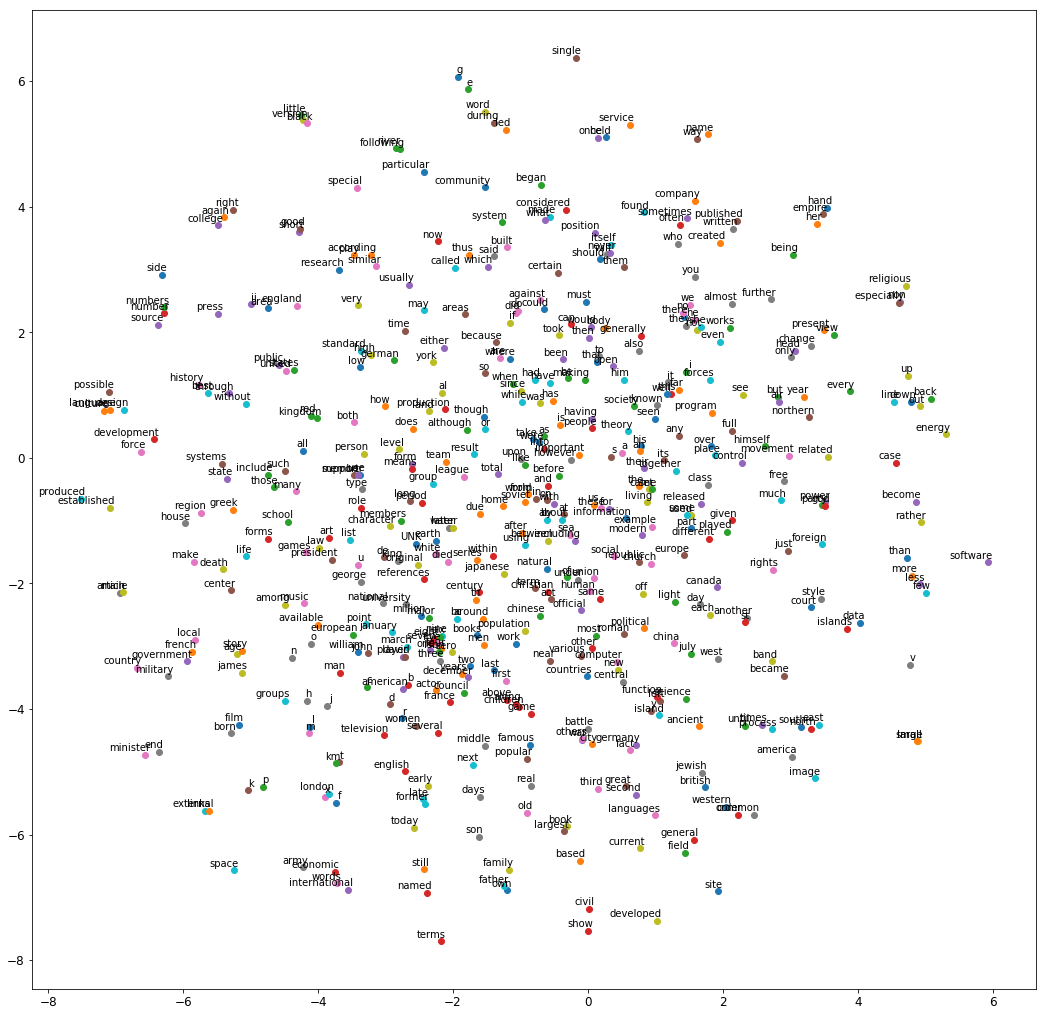

In [129]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
plot_only = 500
low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only,:])
labels = [vocabulary[i] for i in range(plot_only)]
plot_with_labels(low_dim_embs, labels)

In [133]:
import tensorflow as tf

reset_graph()

n_steps = 50
n_neurons = 200
n_layers = 3
num_encoder_symbols = 20000
num_decoder_symbols = 20000
embedding_size = 150
learning_rate = 0.01

X = tf.placeholder(tf.int32, [None, n_steps])
Y = tf.placeholder(tf.int32, [None, n_steps])
W = tf.placeholder(tf.float32, [None, n_steps - 1, 1])
Y_input = Y[:, :-1]
Y_target = Y[:, 1:]

encoder_inputs = tf.unstack(tf.transpose(X))
decoder_inputs = tf.unstack(tf.transpose(Y_input))

lstm_cells = [tf.contrib.rnn.BasicLSTMCell(num_units = n_neurons)
             for layer in range(n_layers)]
cell = tf.contrib.rnn.MultiRNNCell(lstm_cells)

output_seqs, states = tf.contrib.legacy_seq2seq.embedding_rnn_seq2seq(encoder_inputs,
    decoder_inputs,
    cell,
    num_encoder_symbols,
    num_decoder_symbols,
    embedding_size)

logits = tf.transpose(tf.unstack(output_seqs), perm = [1, 0, 2])

In [134]:
logits_flat = tf.reshape(logits, [-1, num_decoder_symbols])
Y_target_flat = tf.reshape(Y_target, [-1])
W_flat = tf.reshape(W, [-1])
xentropy = W_flat * tf.nn.sparse_softmax_cross_entropy_with_logits(labels = Y_target_flat, logits = logits_flat)
loss = tf.reduce_mean(xentropy)

optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()